# Load Places Classifier

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import os
import cv2
from tqdm import tqdm
import tensorflow as tf
from tensorflow.keras import models

model = models.load_model("places_classifier_model.h5")

In [2]:
DATADIR = "./data"
CATEGORIES = ["isurumuniya_pem_yuwala", "isurumuniya_viharaya", "minisa_saha_ashwa_hisa", "sigiriya_bithu_sithuwam", "sigiriya", "sigiriya_singha_padhaya", "dalada_maligawa", "sri_padhaya", "awkana_buddha_prathimawa", "samadhi_prathimawa", "kiri_vehera", "madirigiriya_watadageya", "nallur_kovil" ]
IMG_SIZE = 128

# Preprocess & Predict Images

In [5]:
def predict_places():
    test_images = []
    test_images_to_predict = []
    predicted_labels = []

    for i in range(13):
        img = DATADIR + "/test{}.jpg".format(i + 1)
        img_array_bgr = cv2.imread(img ,cv2.IMREAD_COLOR)  # convert to array        
        image_array_rgb = cv2.cvtColor(img_array_bgr, cv2.COLOR_BGR2RGB) # Convert to RGB
        new_array = cv2.resize(image_array_rgb, (IMG_SIZE, IMG_SIZE))
        test_images.append(new_array)
        test_images_to_predict.append(np.array([new_array]).reshape(-1, IMG_SIZE, IMG_SIZE, 3))
    
    for j in test_images_to_predict:
        y_prob = model.predict(j)
        predicted_labels.append(y_prob.argmax(axis=-1))
    return predicted_labels, test_images

In [6]:
predicted_labels, test_images = predict_places()

# Visualize Predictions

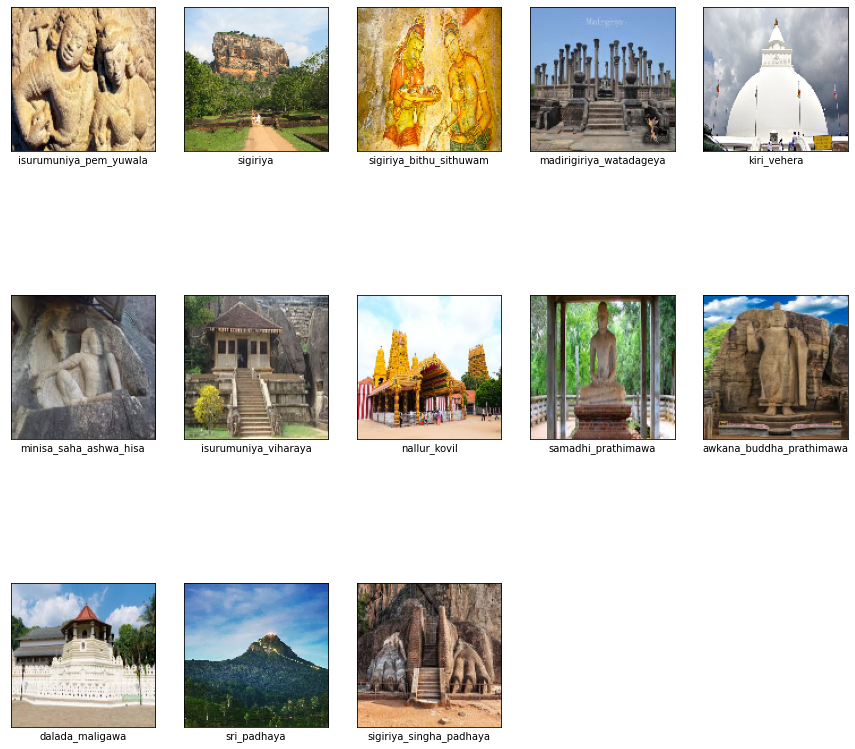

In [7]:
plt.figure(figsize=(15,15))
for i in range(13):
    plt.subplot(3,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(test_images[i], cmap=plt.cm.binary)
    plt.xlabel(CATEGORIES[predicted_labels[i][0]])
plt.show()